# COMP40311 Major Project
# Student name: Mohd. Zafar A. A. Khan
# Student Id: N1234799
**________________________________________________________________________________________________________________________**
**________________________________________________________________________________________________________________________**

<h1 style="text-align: center;"> Bio-inspired Audio CODEC using Spiking Neural Networks (SNN)</h1>

**________________________________________________________________________________________________________________________**
**________________________________________________________________________________________________________________________**


## Introduction

This project explores the development of a bio-inspired audio codec leveraging Spiking Neural Networks (SNN). The main goal is to reconstruct stereo audio signals from raw spike data generated by an SNN and evaluate the quality of these reconstructions.

### Overview

1. **Data Loading:** We begin by loading the raw audio data, timestamps, and sampling rate from pre-saved files. This data includes spike amplitudes and their corresponding timestamps for both left and right audio channels.

2. **Signal Reconstruction:** Using linear interpolation, we reconstruct the audio signals from the raw spike data. This process involves aligning timestamps, normalizing them, and applying interpolation to generate continuous audio signals.

3. **Saving Audio:** The reconstructed stereo audio signals are then saved as a WAV file, making them accessible for further analysis and playback.

4. **Plotting Reconstruction:** To visually compare the original and reconstructed audio signals, we generate plots displaying both sets of signals. This comparison helps in assessing the quality of the reconstruction.

5. **Detailed Analysis:** Finally, a detailed analysis is performed to evaluate the amplitude characteristics of both the original and reconstructed signals. Metrics such as maximum and minimum amplitudes are compared to quantify the accuracy of the reconstruction.

### Additional Features

- **Spike Detection:** The project includes functionality to detect spikes in the reconstructed signals and compute metrics like the number of spikes and distances between spike trains using Purpura distance and Rossum metric.

This notebook provides a comprehensive view of the process involved in reconstructing and analyzing audio signals using bio-inspired techniques, showcasing the capabilities and effectiveness of Spiking Neural Networks in audio signal processing.


**________________________________________________________________________________________________________________________**
# 1. Simulation of Neuron Spiking with Varying Input Current
**________________________________________________________________________________________________________________________**

The code in the cell below performs a simulation to observe the spiking behavior of a neuron when it is subjected to varying input currents. The simulation uses the NEST simulator and plots the number of spikes as the function of the input current.

## 1.1. Overview of the Simulation Process

The simulation process involves several key steps, each of them critical for understanding how the neuron responds to different levels of input currents. Below is a detailed breakdown of these steps:

### i. NEST Kernel Initialization

The NEST kernel has been reset to ensure a clean simulation environment, and a spike recorder is created to track the spike generation by the neuron during the simulation.

| Function                      | Purpose                                               |
|-------------------------------|-------------------------------------------------------|
| `nest.ResetKernel()`           | Resets the NEST simulation environment                |
| `nest.set_verbosity(20)`       | Sets the verbosity level for detailed logging         |
| `nest.Create('spike_recorder')`| Creates a device to record spikes                     |

### ii. Neuron Creation and Parameter Initialization

A neuron model of type **iaf_psc_alpha** is created. This model simulates an integrate-and-fire neuron with alpha-shaped postsynaptic currents.

| Parameter       | Value   | Description                                      |
|-----------------|---------|--------------------------------------------------|
| `C_m`           | 250.0 pF| Membrane capacitance                             |
| `tau_m`         | 10.0 ms | Membrane time constant                           |
| `t_ref`         | 2.0 ms  | Refractory period                                |
| `E_L`           | 0.0 mV  | Resting membrane potential                       |
| `V_th`          | 20.0 mV | Threshold potential                              |
| `V_reset`       | 10.0 mV | Reset potential after a spike                    |
| `tau_syn_ex`    | 0.5 ms  | Time constant for excitatory synaptic currents   |
| `tau_syn_in`    | 0.5 ms  | Time constant for inhibitory synaptic currents   |

These parameters govern the neuron's electrical behavior and determine how it integrates incoming synaptic currents and generates spikes.

### iii. Simulation Loop

The loop runs with the input current starting from 370 pA and increases by 1 pA per iteration.

| Variable               | Initial Value  | Description                                                |
|------------------------|----------------|------------------------------------------------------------|
| `current`              | 370 pA         | Starting input current applied to the neuron               |
| `inc`                  | 1 pA           | Increment value for each iteration                         |
| `min_current`          | 0 pA           | Minimum current required to generate spikes                |
| `num_spikes`           | 0              | Initial spike count                                        |
| `actual_number_spikes` | 0              | Records the actual number of spikes observed               |
| `current_spikes_values`| `[[0, 0]]`     | Stores current and spike count pairs                       |

### iv. Results and Data Storage

The current_spikes_values list captures pairs of current values and spike counts where the spike count increases. The list is saved as a .npy file for potential future analysis.

| Data Structure           | Description                                                      |
|--------------------------|------------------------------------------------------------------|
| `current_spikes_values`   | Stores current and corresponding spike count where spikes increased |
| `currents`               | List of all input currents tested                                |
| `spike_counts`           | List of spike counts corresponding to each input current         |

### v. Plotting

A plot is generated to visualize the relationship between the input current and the number of spikes. The x-axis represents the input current (in pA), and the y-axis represents the number of spikes observed.

| Plot Element | Description                                        |
|--------------|----------------------------------------------------|
| X-axis       | Input Current (pA)                                 |
| Y-axis       | Number of Spikes                                   |
| Line Style   | Line plot with markers for each data point         |

Key Observations
Current-Spikes Relationship:
The list current_spikes_values contains crucial data points where the input current leads to an increase in the number of spikes. This can be used to analyze the neuron's firing threshold and its sensitivity to different input currents.

Plot:
The generated plot provides a visual representation of the neuron’s spiking behavior in response to increasing input currents, offering insights into its dynamic response.



For 379 the number of spikes is 1
For 414 the number of spikes is 2
For 480 the number of spikes is 3
For 504 the number of spikes is 4
For 505 the number of spikes is 5
For 506 the number of spikes is 6
For 507 the number of spikes is 7
For 508 the number of spikes is 8
For 509 the number of spikes is 11
Result: [[378, 0], [379, 1], [414, 2], [480, 3], [504, 4], [505, 5], [506, 6], [507, 7], [508, 8], [509, 11]]


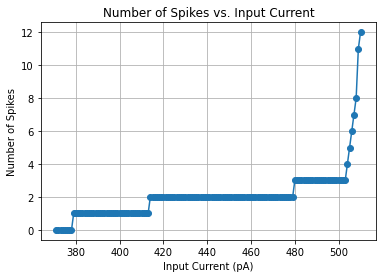

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import nest

# Reset the NEST kernel
nest.ResetKernel()
nest.set_verbosity(20)  # Set NEST verbosity level to 20

# Create a spike recorder
spike_recorder = nest.Create('spike_recorder')

# Initialize variables and lists
currents = []  # List to store input currents
spike_counts = []  # List to store spike counts
min_current = 0  # Variable to store the minimum current
inc = 1  # Increment value for increasing the current
current = 370  # Initial current value
num_spikes = 0  # Variable to store the number of spikes
neuron_params = {
    'C_m': 250.0,       # Membrane capacitance (pF)
    'tau_m': 10.0,      # Membrane time constant (ms)
    't_ref': 2.0,       # Refractory period (ms)
    'E_L': 0.0,         # Resting membrane potential (mV)
    'V_th': 20.0,       # Threshold potential (mV)
    'V_reset': 10.0,    # Reset potential (mV)
    'tau_syn_ex': 0.5,  # Excitatory synaptic time constant (ms)
    'tau_syn_in': 0.5   # Inhibitory synaptic time constant (ms)
}

# Create a single neuron with the IAF_PSC_ALPHA model
neuron = nest.Create('iaf_psc_alpha')

# List to store current and spike count pairs where number of spikes increased
current_spikes_values = [[0, 0]]
current_spikes_idx = 0  # Index for current_spikes_values list
actual_number_spikes = 0  # Actual number of spikes observed
number_spikes = 0  # Number of spikes observed

# Connect the neuron to the spike recorder
nest.Connect(neuron, spike_recorder)

# Loop through the input currents from 200 to 500 in increments of 10
while current < 800 and num_spikes < 12:
    nest.SetStatus(neuron, neuron_params)
    nest.SetStatus(spike_recorder, {'n_events': 0})
    neuron = nest.Create('iaf_psc_alpha')

    # Connect the neuron to the spike recorder
    nest.Connect(neuron, spike_recorder)

    # Set the input current to the neuron
    nest.SetStatus(neuron, {'I_e': current})
    current += inc  # Increment the current

    # Simulate for 50 ms
    nest.Simulate(50.0)

    # Get the number of spikes recorded by the spike recorder
    num_spikes = nest.GetStatus(spike_recorder, 'n_events')[0]

    # Store the current and spike count
    currents.append(current)
    spike_counts.append(num_spikes)

    # Record the current and spike count if the number of spikes increased
    if num_spikes == 0 and current > min_current:
        min_current = current
        current_spikes_values[0][0] = current
        number_spikes = 0
        current_spikes_idx = 1
    if num_spikes > 0:
        if num_spikes > actual_number_spikes:
            if len(current_spikes_values) < 10:
                current_spikes_values.append([current, num_spikes])
                actual_number_spikes = num_spikes
                print("For", current, "the number of spikes is", num_spikes)
            else:
                break

# Print the result
print("Result:", current_spikes_values)

# Save the current_spikes_values as npy file
np.save('results/current_spikes_values.npy', current_spikes_values)

# Plot the number of spikes for different increments
plt.plot(currents, spike_counts, marker='o')
plt.title('Number of Spikes vs. Input Current')
plt.xlabel('Input Current (pA)')
plt.ylabel('Number of Spikes')
plt.grid(True)
plt.show()

**________________________________________________________________________________________________________________________**

# 2. Audio Processing and Visualization
**________________________________________________________________________________________________________________________**

This code below describes the process of converting an MP3 file to WAV format, extracting key information, visualizing the audio signal, and storing the processed data.

## **2.1. Audio File Conversion**

The MP3 audio file is converted to WAV format using the `pydub` library. This conversion is essential for more manageable processing and analysis.

## **2.2. Displaying Audio Information**

After conversion, essential details about the audio file has been extracted and displayed.

### **Audio Information**

| Parameter           | Description                                                                                  |
|---------------------|----------------------------------------------------------------------------------------------|
| Sampling Rate       | The rate at which the audio samples were recorded (in Hz).                                    |
| Number of Samples   | Total number of audio samples in the file.                                                    |
| Length (seconds)    | Duration of the audio file, calculated as the number of samples divided by the sampling rate.|
| Minimum Value       | The smallest amplitude value in the audio signal.                                            |
| Maximum Value       | The largest amplitude value in the audio signal.                                             |

## **2.3. Plotting the Audio Signal**

We plot the audio signal to visualize the waveform.

### **Plotting Considerations**

- **Subset Plotting**: For large audio files, only a subset (up to 1 million samples) is plotted to ensure manageable visualization.
- **Plot Details**: The plot shows the amplitude variations over time, providing insights into the audio’s dynamics.

#### **Audio Signal Plot**

- **Title**: `Audio Signal`
- **X-axis**: `Sample`
- **Y-axis**: `Amplitude`


## 2.4. Saving the Processed Data

The processed audio data and sampling rate are saved in `.npy` files for future use.

### Saved Files

| File Name  | Description                                 |
|------------|---------------------------------------------|
| `data.npy` | Contains the audio data (amplitude values). |
| `rate.npy` | Contains the sampling rate of the audio file. |

## 2.5. Key Results

Here is a summary of the results obtained from processing the audio file:

### Audio File Details

| Property           | Value        |
|--------------------|--------------|
| Number of Samples  | 1323000     |
| Length (seconds)   | 30.0 seconds|
| Minimum Value      | -26270       |
| Maximum Value      | 30423        |

### Data Structures

| Data Structure | Description                                         |
|----------------|-----------------------------------------------------|
| `data`         | Contains the audio signal data (amplitude values). |
| `rate`         | The sampling rate of the audio signal.            |
| `data.npy`     | File storing the audio data in `.npy` format.      |
| `rate.npy`     | File storing the sampling rate in `.npy` format.   |

### Plotting Results

The plot of the audio signal visualizes the amplitude over time, helping to understand waveform variations.


## Summary

- **Conversion**: MP3 to WAV conversion was successful.
- **Information Extraction**: Key audio parameters such as sampling rate, number of samples, and amplitude range were extracted.
- **Visualization**: The audio waveform was plotted to analyze amplitude variations.
- **Data Storage**: Processed data and sampling rate were saved for further use.

This comprehensive analysis ensures that the audio data is processed effectively and is ready for subsequent applications.



Audio Information:
Number of samples: 1323000
Length (seconds): 30.0
Minimum value: -26270
Maximum value: 30423


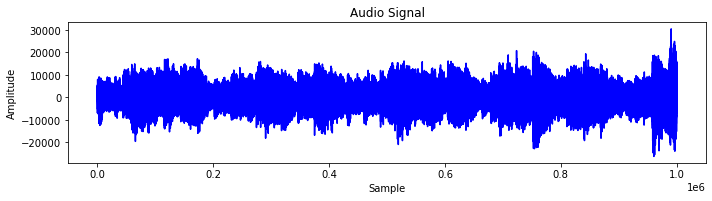

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
import io
from scipy.io import wavfile
import os

# Ensure the results directory exists
os.makedirs('results', exist_ok=True)

# Function to convert mp3 to wav and return its data
def read_mp3(filename):
    sound = AudioSegment.from_mp3(filename)
    with io.BytesIO() as wav_data:
        sound.export(wav_data, format="wav")
        wav_data.seek(0)
        rate, data = wavfile.read(wav_data)
    return rate, data

# Function to display sound file information
def display_info(data, rate):
    num_samples = len(data)
    length = num_samples / rate
    min_val = np.min(data)
    max_val = np.max(data)
    print("Number of samples:", num_samples)
    print("Length (seconds):", length)
    print("Minimum value:", min_val)
    print("Maximum value:", max_val)

# Read the mp3 files
rate, data = read_mp3('Sound/Song.mp3')

# Display information about the sound file
print("Audio Information:")
display_info(data, rate)

# Plot the data
plt.figure(figsize=(10, 5))

# Handle large audio files by plotting a subset if necessary
if len(data) > 1000000:  # If the data is too large, downsample for plotting
    subset = data[:1000000]  # Plot the first 1 million samples
    x = np.arange(len(subset))
else:
    x = np.arange(len(data))
    subset = data

plt.subplot(2, 1, 1)
plt.plot(x, subset, color='blue')
plt.title('Audio Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Store the data in npy files
np.save('results/data.npy', data)
np.save('results/rate.npy', rate)


**________________________________________________________________________________________________________________________**

# 3. Testing Current Retrieval Function
**________________________________________________________________________________________________________________________**


## 3.1. Description of the Code

The code below demonstrates how to retrieve and test current values based on indices from a pre-saved `.npy` file containing `current_spikes_values`. The `current_spikes_values.npy` file stores data related to current values and the number of spikes observed. The code performs several tests to verify the function's ability to handle different ranges of indices.

### i. Function Definition

#### `get_current_for_idx(idx)`

- **Purpose**: Retrieves the current value for a given index from the `current_spikes_values` array.
- **Parameters**: 
  - `idx` (int): The index for which to retrieve the current value.
- **Returns**: The current value corresponding to the index.
- **Error Handling**: Raises a `ValueError` if the index is out of range.

### ii. Test Cases

#### Testing Indices from 0 to 9 (Neuron 0)

| Description | Details                          |
|-------------|----------------------------------|
| **Range**   | 0 to 9                            |
| **Number of Tests** | 20 random indices              |
| **Purpose** | Verify that the function correctly retrieves current values within this range. |

#### Testing Values from 10 to 90 (Neuron 1)

| Description | Details                          |
|-------------|----------------------------------|
| **Range**   | 10 to 90                          |
| **Number of Tests** | 20 random values              |
| **Normalization** | Values divided by 10 to map to indices (0 to 9) |
| **Purpose** | Ensure the function handles normalized indices correctly. |

#### Testing Values from 100 to 900 (Neuron 2)

| Description | Details                          |
|-------------|----------------------------------|
| **Range**   | 100 to 900                        |
| **Number of Tests** | 20 random values              |
| **Normalization** | Values divided by 100 to map to indices (0 to 9) |
| **Purpose** | Verify that the function can handle and correctly map higher ranges. |

#### Testing Values from 1000 to 9000 (Neuron 3)

| Description | Details                          |
|-------------|----------------------------------|
| **Range**   | 1000 to 9000                      |
| **Number of Tests** | 20 random values              |
| **Normalization** | Values divided by 1000 to map to indices (0 to 9) |
| **Purpose** | Ensure that the function manages and correctly maps even larger values. |

#### Testing Values from 10000 to 90000 (Neuron 4)

| Description | Details                          |
|-------------|----------------------------------|
| **Range**   | 10000 to 90000                    |
| **Number of Tests** | 20 random values              |
| **Normalization** | Values divided by 1000 to map to indices (0 to 9) |
| **Purpose** | Check that the function can correctly process values from a higher range and maps them accurately. |

#### Testing Values from -1 to 1 (Neuron 5)

| Description | Details                          |
|-------------|----------------------------------|
| **Range**   | -1 to 1                           |
| **Number of Tests** | 20 random values              |
| **Normalization** | Negative values are adjusted to 0 |
| **Purpose** | Test the function's behavior with edge cases, particularly with negative indices. |

### Summary

- **Functionality**: The `get_current_for_idx` function is tested for a range of indices and values to ensure it retrieves the correct current values from the `current_spikes_values.npy` file.
- **Error Handling**: Includes error handling to manage indices that fall outside the valid range.
- **Normalization**: Demonstrates the process of normalizing values to fit within the expected index range for testing.

This code is essential for validating the correctness of the function responsible for retrieving current values based on the various indices, ensuring robustness and the accuracy in handling different scenarios.


In [28]:
import numpy as np

# Function to get current for a given index
def get_current_for_idx(idx):
    # Load the current_spikes_values from npy file
    current_spikes_values = np.load('results/current_spikes_values.npy')

    # Check if the index is within the valid range
    if 0 <= idx < len(current_spikes_values):
        return current_spikes_values[idx][0]
    else:
        raise ValueError("Index out of range")


#####################################
# test values from 0 to 9 - Neuron 0
#####################################
# Generate 20 random indices from 0 to 9, including 0
random_indices = np.random.randint(0, 10, size=20)

# Test the function for each random index
for idx in random_indices:
    try:
        current = get_current_for_idx(idx)
        print(f"Current for index {idx}: {current}")
    except ValueError as e:
        print(f"Error: {e}")

#######################################
# test values from 10 to 90 - Neuron 1
#######################################
# Generate 20 random values from 10 to 90
random_values = np.random.randint(10, 90, size=20)
# normlise values
# Test the function for each random index
for idx in random_values:
    try:
        current = get_current_for_idx(int(idx/10))
        print(f"Current for value {idx}: {current}")
    except ValueError as e:
        print(f"Error: {e}")


#########################################
# test values from 100 to 900 - Neuron 2
#########################################
# Generate 20 random values from 100 to 90
random_values = np.random.randint(100, 900, size=20)
# normlise values
# Test the function for each random index
for idx in random_values:
    try:
        current = get_current_for_idx(int(idx/100))
        print(f"Current for value {idx}: {current}")
    except ValueError as e:
        print(f"Error: {e}")

###########################################
# test values from 1000 to 9000 - Neuron 3
###########################################
# Generate 20 random values from 1000 to 9000
random_values = np.random.randint(1000, 9000, size=20)
# normlise values
# Test the function for each random index
for idx in random_values:
    try:
        current = get_current_for_idx(int(idx/1000))
        print(f"Current for value {idx}: {current}")
    except ValueError as e:
        print(f"Error: {e}")

############################################
# test values from 10000 to 90000 - Neuron 4
############################################
# Generate 20 random values from 10000 to 90000
random_values = np.random.randint(10000, 90000, size=20)
# normlise values
# Test the function for each random index
for idx in random_values:
    try:
        current = get_current_for_idx(int(idx/1000))
        print(f"Current for value {idx}: {current}")
    except ValueError as e:
        print(f"Error: {e}")

############################################
# test values from -1 to 1 - Neuron 5
############################################
# Generate 20 random values from 10000 to 90000
random_values = np.random.randint(-1, 2, size=20)
# normlise values
# Test the function for each random index
for idx in random_values:
    try:
        idx1=-idx
        if idx1<0:
            idx1=0
        current = get_current_for_idx(idx1)
        print(f"Current for value {idx}: {current}")
    except ValueError as e:
        print(f"Error: {e}")

Current for index 2: 414
Current for index 3: 480
Current for index 4: 504
Current for index 3: 480
Current for index 1: 379
Current for index 6: 506
Current for index 5: 505
Current for index 8: 508
Current for index 2: 414
Current for index 3: 480
Current for index 0: 378
Current for index 4: 504
Current for index 0: 378
Current for index 9: 509
Current for index 9: 509
Current for index 1: 379
Current for index 0: 378
Current for index 6: 506
Current for index 5: 505
Current for index 1: 379
Current for value 89: 508
Current for value 37: 480
Current for value 28: 414
Current for value 88: 508
Current for value 64: 506
Current for value 15: 379
Current for value 69: 506
Current for value 12: 379
Current for value 84: 508
Current for value 45: 504
Current for value 79: 507
Current for value 64: 506
Current for value 20: 414
Current for value 28: 414
Current for value 16: 379
Current for value 36: 480
Current for value 24: 414
Current for value 81: 508
Current for value 20: 414
Curren

**________________________________________________________________________________________________________________________**

# 4. Testing Current Retrieval and Reconstruction
**________________________________________________________________________________________________________________________**


The code below describes the process of encoding and decoding values using spike currents. The process involves converting a given value into spike currents, reconstructing the value from these currents, and verifying the correctness of the reconstruction.

## 4.1. Loading Data

The `current_spikes_values` array is loaded from a `.npy` file. This array contains the spike currents for various indices and is used for encoding and decoding values.

### Loaded Data Information

| Property                      | Value                  |
|-------------------------------|------------------------|
| Shape of `current_spikes_values` | `(10, 2)`             |
| Type of `current_spikes_values`  | `numpy.ndarray`       |

### Example Data

| Index | Current Spike Value |
|-------|---------------------|
| 0     | 378                 |
| 1     | 379                 |
| 2     | 414                 |
| 3     | 480                 |
| 4     | 504                 |
| 5     | 505                 |
| 6     | 506                 |
| 7     | 507                 |
| 8     | 508                 |
| 9     | 509                 |

## 4.2. Functions

### `get_current_for_idx(idx)`

**Description:** Retrieves the spike current value for a given index from the `current_spikes_values` array.

**Parameters:**
- `idx` (int): The index of the spike current value.

**Returns:** The spike current value corresponding to the given index.

### `get_currents_for_value(value)`

**Description:** Encodes a given value into an array of spike currents for each neuron.

**Parameters:**
- `value` (int): The value to be encoded.

**Returns:** An array of spike currents for each neuron.

**Encoding Method:**

| Neuron | Description                                     |
|--------|-------------------------------------------------|
| 0-4    | Encodes each digit of the absolute value       |
| 5      | Encodes the sign of the value (positive or negative) |

### `reconstruct_value_from_currents(currents)`

**Description:** Decodes a set of spike currents back into the original value.

**Parameters:**
- `currents` (array): An array of spike currents.

**Returns:** The reconstructed original value.

## 4.3. Random Value Testing

### Test Overview

Random values between -99,999 and 99,999 are generated and tested to verify the encoding and decoding functions.

### Example Test Results

| Original Value | Currents                                    | Reconstructed Value |
|----------------|---------------------------------------------|---------------------|
| 34200          | [0. 0. 2. 4. 3. 0.]                       | 34200               |
| -66743         | [3. 4. 7. 6. 6. 1.]                       | -66743              |
| 82235          | [5. 3. 2. 2. 8. 0.]                       | 82235               |
| -26148         | [8. 4. 1. 6. 2. 1.]                       | -26148              |
| -36140         | [0. 4. 1. 6. 3. 1.]                       | -36140              |
| 75026          | [6. 2. 0. 5. 7. 0.]                       | 75026               |
| -83489         | [11. 8. 4. 3. 8. 1.]                      | -83489              |
| 64782          | [2. 8. 7. 4. 6. 0.]                       | 64782               |
| -13769         | [11. 6. 7. 3. 1. 1.]                      | -13769              |
| 58386          | [6. 8. 3. 8. 5. 0.]                       | 58386               |
| 75400          | [0. 0. 4. 5. 7. 0.]                       | 75400               |
| -51226         | [6. 2. 2. 1. 5. 1.]                       | -51226              |
| -77875         | [5. 7. 8. 7. 7. 1.]                       | -77875              |
| 84800          | [0. 0. 8. 4. 8. 0.]                       | 84800               |
| -4689          | [11. 8. 6. 4. 0. 1.]                      | -4689               |
| 75854          | [4. 5. 8. 5. 7. 0.]                       | 75854               |
| 86841          | [1. 4. 8. 6. 8. 0.]                       | 86841               |
| -76001         | [1. 0. 0. 6. 7. 1.]                       | -76001              |
| -3014          | [4. 1. 0. 3. 0. 1.]                       | -3014               |
| 14379          | [11. 7. 3. 4. 1. 0.]                      | 14379               |
| 39787          | [7. 8. 7. 11. 3. 0.]                      | 39787               |
| 87624          | [4. 2. 6. 7. 8. 0.]                       | 87624               |
| 35711          | [1. 1. 7. 5. 3. 0.]                       | 35711               |
| -53992         | [2. 11. 11. 3. 5. 1.]                    | -53992              |
| -84617         | [7. 1. 6. 4. 8. 1.]                      | -84617              |
| 24694          | [4. 11. 6. 4. 2. 0.]                     | 24694               |
| -52607         | [7. 0. 6. 2. 5. 1.]                      | -52607              |
| 67925          | [5. 2. 11. 7. 6. 0.]                     | 67925               |
| 97903          | [3. 0. 11. 7. 11. 0.]                   | 97903               |
| 1713           | [3. 1. 7. 1. 0. 0.]                     | 1713                |

## Summary

- **Loading Data:** The `current_spikes_values` array was successfully loaded and inspected.
- **Encoding and Decoding:** Functions for encoding values into spike currents and decoding currents back into values were implemented and tested.
- **Verification:** Random values were encoded and then decoded to verify that the original values could be reconstructed accurately.

This comprehensive analysis ensures that the functions for handling spike currents and values are working correctly and effectively.


In [29]:
import numpy as np

# Load the current_spikes_values array
current_spikes_values = np.load('results/current_spikes_values.npy')

# Print the shape and type of the loaded array
print(f"Shape of current_spikes_values: {current_spikes_values.shape}")
print(f"Type of current_spikes_values: {type(current_spikes_values)}")

# Print the first 10 rows of the current_spikes_values
print("First 10 rows of current_spikes_values:")
print(current_spikes_values[:10])

# Function to get current for a given index
def get_current_for_idx(idx):
    """
    Get the current spike value for a given index.
    """
    if 0 <= idx < len(current_spikes_values):
        return current_spikes_values[idx, 1]  # Retrieve the current value from the second column
    else:
        raise ValueError("Index out of range")

# Function to get currents for a given value
def get_currents_for_value(value):
    """
    Encode a value into an array of spike currents for each neuron.
    """
    currents = np.zeros(6)

    # Normalize the value to be within the range of -99999 to 99999
    value = max(-99999, min(value, 99999))

    # Encoding the value into spike currents
    if value >= 0:
        currents[5] = get_current_for_idx(0)  # Neuron 5: No spike for positive values
    else:
        currents[5] = get_current_for_idx(1)  # Neuron 5: Activate negative spike neuron

    # Encode each digit of the absolute value into a spike current
    for i in range(5):
        digit = (abs(value) // (10 ** i)) % 10
        currents[i] = get_current_for_idx(digit)
    
    return currents

# Function to decode the spike currents back into the original value
def reconstruct_value_from_currents(currents):
    """
    Decode a set of spike currents back into the original value.
    """
    indices = []
    for i in range(5):
        current_value = currents[i]
        # Find the index of the current value in the data
        idx = np.where(current_spikes_values[:, 1] == current_value)[0]
        if len(idx) == 0:
            print(f"Warning: Current value {current_value} not found in current_spikes_values.")
            return -11111  # Failed to find the correct mapping
        indices.append(idx[0])

    # Reconstruct the value from indices
    value = sum(idx * (10 ** i) for i, idx in enumerate(indices))

    # Adjust the sign based on the sixth neuron
    if currents[5] == get_current_for_idx(1):
        value *= -1

    return value

# Generate 30 random values between -99999 and 99999 (inclusive)
random_values = np.random.randint(-99999, 100000, size=30)

# Print the value, the currents for each neuron, and the reconstructed value
for value in random_values:
    currents = get_currents_for_value(value)
    print(f"Original Value: {value}, Currents: {currents}")
    reconstructed_value = reconstruct_value_from_currents(currents)
    print(f"Reconstructed Value: {reconstructed_value}")


Shape of current_spikes_values: (10, 2)
Type of current_spikes_values: <class 'numpy.ndarray'>
First 10 rows of current_spikes_values:
[[378   0]
 [379   1]
 [414   2]
 [480   3]
 [504   4]
 [505   5]
 [506   6]
 [507   7]
 [508   8]
 [509  11]]
Original Value: 34200, Currents: [0. 0. 2. 4. 3. 0.]
Reconstructed Value: 34200
Original Value: -66743, Currents: [3. 4. 7. 6. 6. 1.]
Reconstructed Value: -66743
Original Value: 82235, Currents: [5. 3. 2. 2. 8. 0.]
Reconstructed Value: 82235
Original Value: -26148, Currents: [8. 4. 1. 6. 2. 1.]
Reconstructed Value: -26148
Original Value: -36140, Currents: [0. 4. 1. 6. 3. 1.]
Reconstructed Value: -36140
Original Value: 75026, Currents: [6. 2. 0. 5. 7. 0.]
Reconstructed Value: 75026
Original Value: -83489, Currents: [11.  8.  4.  3.  8.  1.]
Reconstructed Value: -83489
Original Value: 64782, Currents: [2. 8. 7. 4. 6. 0.]
Reconstructed Value: 64782
Original Value: -13769, Currents: [11.  6.  7.  3.  1.  1.]
Reconstructed Value: -13769
Original Val

**________________________________________________________________________________________________________________________**

# 5. Simulation of Spiking Neural Network (SNN) for Sound Data
**________________________________________________________________________________________________________________________**


The code below outlines the process for simulating a spiking neural network (SNN) using sound data. The goal is to encode sound amplitudes into spike currents, run simulations on these encoded currents, and analyze the results.

## 5.1. Data Preparation

### Data Chunking

The data is chunked into smaller segments based on a specified duration. Each chunk represents a time segment of the sound data.

**Function:** `chunk_data(data, rate, duration_sec)`

- **Parameters:**
  - `data`: The raw sound data.
  - `rate`: The sampling rate of the data.
  - `duration_sec`: Duration of each chunk in seconds.

- **Returns:** A list of data chunks.

**Example Configuration:**

| Parameter        | Value              |
|------------------|--------------------|
| Duration         | 1/30 second        |

## 5.2. Plotting Functions

### Data Plotting

**Function:** `plot_data(data, title)`

- **Parameters:**
  - `data`: The data to be plotted.
  - `title`: Title of the plot.

- **Usage:** Visualize the amplitude of the data samples.

### Raster Plotting

**Function:** `raster_plot(raster_data, chunk_idx, num_total_neurons)`

- **Parameters:**
  - `raster_data`: The raster data for plotting.
  - `chunk_idx`: Index of the current data chunk.
  - `num_total_neurons`: Total number of neurons.

- **Usage:** Visualize the spike events of neurons over time.

## 5.3. Encoding and Simulation

### Encoding Function

**Function:** `get_currents_for_value(value)`

- **Description:** Converts a value into spike currents for different neurons based on its magnitude.

- **Parameters:**
  - `value`: The value to be encoded.

- **Returns:** An array of currents for six neurons.

**Neuron Encoding:**

| Neuron | Description                             |
|--------|-----------------------------------------|
| 0-4    | Encodes each digit of the absolute value|
| 5      | Encodes the sign of the value           |

### Simulation Function

**Function:** `simulate_snn(chunks, num_total_neurons)`

- **Description:** Simulates the SNN using the given data chunks.

- **Parameters:**
  - `chunks`: The data chunks to be simulated.
  - `num_total_neurons`: Total number of neurons in the simulation.

- **Details:**
  - Resets and configures the SNN.
  - Simulates each chunk of data and records spikes.
  - Saves spike data to `.npy` and `.h5` files.

**Neurons Parameters:**

| Parameter       | Value        |
|-----------------|--------------|
| `C_m`           | 250.0 pF     |
| `tau_m`         | 10.0 ms      |
| `t_ref`         | 2.0 ms       |
| `E_L`           | 0.0 mV       |
| `V_th`          | 20.0 mV      |
| `V_reset`       | 10.0 mV      |
| `tau_syn_ex`    | 0.5 ms       |
| `tau_syn_in`    | 0.5 ms       |

## 5.4. Execution

### Data Loading and Chunking

- **Data File:** `results/data.npy`
- **Rate File:** `results/rate.npy`
- **Chunk Duration:** 1/30 second
- **Number of Neurons per Sample:** 6 (2 channels, each with 3 neurons)

### Simulation Results

**Process:**

1. Data is loaded and chunked.
2. SNN is simulated for each chunk.
3. Spike times and senders are saved to files.


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import nest
import time as tm
import h5py

# Function to chunk data into chunks of specified duration
def chunk_data(data, rate, duration_sec):
    chunk_size = int(rate * duration_sec)
    num_chunks = len(data) // chunk_size
    chunks = [data[i * chunk_size: (i + 1) * chunk_size] for i in range(num_chunks)]
    return chunks

# Function to plot data
def plot_data(data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data)
    plt.title(title)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.show()

# Function to plot raster plot
def raster_plot(raster_data, chunk_idx, num_total_neurons):
    plt.figure(figsize=(10, 5))
    plt.eventplot(raster_data, colors='black')
    plt.title(f'Raster Plot for Chunk {chunk_idx + 1}')
    plt.xlabel('Time (ms)')
    plt.ylabel('Neuron ID')
    plt.xlim(0, 50)  # Limit x-axis to 50 ms
    plt.ylim(0, num_total_neurons)
    plt.show()

def get_current_for_idx(idx):
    # Load the current_spikes_values from npy file
    current_spikes_values = np.load('results/current_spikes_values.npy')

    # Check if the index is within the valid range
    if 0 <= idx < len(current_spikes_values):
        return current_spikes_values[idx][0]
    else:
        raise ValueError("Index out of range")

# Function to get currents for a given value
def get_currents_for_value(value):
    currents = np.zeros(6)

    # Normalize the value to be within the range of -99999 to 99999
    value = max(-99999, min(value, 99999))

    # Compute currents for each neuron
    if value >= 0:
        currents[5] = get_current_for_idx(0)  # Neuron 5: No spike for positive values
    else:
        currents[5] = get_current_for_idx(1)  # Neuron 5: Activate negative spike neuron

    currents[0] = get_current_for_idx(value % 10)  # Neuron 0: Increment of 1
    currents[1] = get_current_for_idx((value // 10) % 10)  # Neuron 1: Increment of 10
    currents[2] = get_current_for_idx((value // 100) % 10)  # Neuron 2: Increment of 100
    currents[3] = get_current_for_idx((value // 1000) % 10)  # Neuron 3: Increment of 1000
    currents[4] = get_current_for_idx((value // 10000) % 10)  # Neuron 4: Increment of 10000
    return currents

# Function to simulate SNN and plot results
def simulate_snn(chunks, num_total_neurons):
    nest.ResetKernel()
    nest.set_verbosity(20)
    nest.SetKernelStatus({'print_time': False})
    
    neuron_model = 'iaf_psc_alpha'
    pop_left = nest.Create(neuron_model, num_total_neurons, params=neuron_params)
    pop_right = nest.Create(neuron_model, num_total_neurons, params=neuron_params)
    spike_detector_left = nest.Create('spike_recorder')
    spike_detector_right = nest.Create('spike_recorder')

    nest.Connect(pop_left, spike_detector_left)
    nest.Connect(pop_right, spike_detector_right)

    num_chunks = len(chunks)
    total_time = 0

    for chunk_idx, chunk in enumerate(chunks):
        print("Simulating chunk", (chunk_idx+1), "of", num_chunks, "...")
        start_time = tm.time()
        neuron_idx = 0

        # Reset neuron parameters and spike recorder
        nest.SetStatus(pop_left, neuron_params)
        nest.SetStatus(pop_right, neuron_params)

        for sample in chunk:
            # Convert amplitude to current and scale to suitable range
            currents_left = get_currents_for_value(sample[0])
            currents_right = get_currents_for_value(sample[1])

            # Set the current to neurons in the left and right populations
            for i in range(0, 6):
                nest.SetStatus(pop_left[neuron_idx], {'I_e': currents_left[i]})
                nest.SetStatus(pop_right[neuron_idx], {'I_e': currents_right[i]})
                neuron_idx += 1

        nest.Simulate(50.0)  # Simulate for 50 ms

        end_time = tm.time()
        chunk_time = end_time - start_time
        total_time += chunk_time
        print(f"Chunk {chunk_idx+1} processing time: {chunk_time} seconds")

    # Get spike times
    events_left = nest.GetStatus(spike_detector_left, 'events')[0]
    senders_left = events_left["senders"]
    ts_left = events_left["times"]

    events_right = nest.GetStatus(spike_detector_right, 'events')[0]
    senders_right = events_right["senders"]
    ts_right = events_right["times"]

    np.save(f'results/data_left_senders.npy', senders_left)
    np.save(f'results/data_left_ts.npy', ts_left)
    np.save(f'results/data_right_senders.npy', senders_right)
    np.save(f'results/data_right_ts.npy', ts_right)

    # Save senders and timestamps in an HDF5 file
    filename = f"results/spike_results.h5"
    with h5py.File(filename, "w") as file:
        file.create_dataset("senders_left", data=senders_left)
        file.create_dataset("ts_left", data=ts_left)
        file.create_dataset("senders_right", data=senders_right)
        file.create_dataset("ts_right", data=ts_right)

    print(f"Total processing time: {total_time} seconds")

neuron_params = {
    'C_m': 250.0,       # Membrane capacitance (pF)
    'tau_m': 10.0,      # Membrane time constant (ms)
    't_ref': 2.0,       # Refractory period (ms)
    'E_L': 0.0,         # Resting membrane potential (mV)
    'V_th': 20.0,       # Threshold potential (mV)
    'V_reset': 10.0,    # Reset potential (mV)
    'tau_syn_ex': 0.5,  # Excitatory synaptic time constant (ms)
    'tau_syn_in': 0.5   # Inhibitory synaptic time constant (ms)
}

# Load the data from npy files
data = np.load('results/data.npy')
rate = np.load('results/rate.npy')

# Chunk the data into chunks of 1/30 second
chunk_duration = 1 / 30  # seconds
chunks = chunk_data(data, rate, chunk_duration)

num_samples = len(chunks[0])
num_neurons_per_sample = 6  # 6 neurons per channel, 2 channels

num_total_neurons = num_samples * num_neurons_per_sample

print("\nSimulating SNN for Sound chunks:")
simulate_snn(chunks, num_total_neurons)



Simulating SNN for Sound chunks:
Simulating chunk 1 of 900 ...
Chunk 1 processing time: 8.154625177383423 seconds
Simulating chunk 2 of 900 ...
Chunk 2 processing time: 7.646737813949585 seconds
Simulating chunk 3 of 900 ...
Chunk 3 processing time: 8.016779899597168 seconds
Simulating chunk 4 of 900 ...
Chunk 4 processing time: 7.982398748397827 seconds
Simulating chunk 5 of 900 ...
Chunk 5 processing time: 7.878574848175049 seconds
Simulating chunk 6 of 900 ...
Chunk 6 processing time: 7.852450370788574 seconds
Simulating chunk 7 of 900 ...
Chunk 7 processing time: 8.28809666633606 seconds
Simulating chunk 8 of 900 ...
Chunk 8 processing time: 8.099600076675415 seconds
Simulating chunk 9 of 900 ...
Chunk 9 processing time: 7.957660436630249 seconds
Simulating chunk 10 of 900 ...
Chunk 10 processing time: 7.881040096282959 seconds
Simulating chunk 11 of 900 ...
Chunk 11 processing time: 7.884076833724976 seconds
Simulating chunk 12 of 900 ...
Chunk 12 processing time: 8.7213003635406

Chunk 100 processing time: 8.774451494216919 seconds
Simulating chunk 101 of 900 ...
Chunk 101 processing time: 8.29080080986023 seconds
Simulating chunk 102 of 900 ...
Chunk 102 processing time: 8.08096957206726 seconds
Simulating chunk 103 of 900 ...
Chunk 103 processing time: 8.091703176498413 seconds
Simulating chunk 104 of 900 ...
Chunk 104 processing time: 8.047557830810547 seconds
Simulating chunk 105 of 900 ...
Chunk 105 processing time: 7.927082777023315 seconds
Simulating chunk 106 of 900 ...
Chunk 106 processing time: 7.860096216201782 seconds
Simulating chunk 107 of 900 ...
Chunk 107 processing time: 8.036203384399414 seconds
Simulating chunk 108 of 900 ...
Chunk 108 processing time: 8.085272312164307 seconds
Simulating chunk 109 of 900 ...
Chunk 109 processing time: 7.885466814041138 seconds
Simulating chunk 110 of 900 ...
Chunk 110 processing time: 8.017920017242432 seconds
Simulating chunk 111 of 900 ...
Chunk 111 processing time: 8.151034355163574 seconds
Simulating chu

Chunk 197 processing time: 7.92399001121521 seconds
Simulating chunk 198 of 900 ...
Chunk 198 processing time: 8.987811803817749 seconds
Simulating chunk 199 of 900 ...
Chunk 199 processing time: 8.267104864120483 seconds
Simulating chunk 200 of 900 ...
Chunk 200 processing time: 8.108501434326172 seconds
Simulating chunk 201 of 900 ...
Chunk 201 processing time: 8.179924964904785 seconds
Simulating chunk 202 of 900 ...
Chunk 202 processing time: 8.037572383880615 seconds
Simulating chunk 203 of 900 ...
Chunk 203 processing time: 7.926950216293335 seconds
Simulating chunk 204 of 900 ...
Chunk 204 processing time: 7.883426189422607 seconds
Simulating chunk 205 of 900 ...
Chunk 205 processing time: 7.950691223144531 seconds
Simulating chunk 206 of 900 ...
Chunk 206 processing time: 8.193049669265747 seconds
Simulating chunk 207 of 900 ...
Chunk 207 processing time: 8.17618465423584 seconds
Simulating chunk 208 of 900 ...
Chunk 208 processing time: 7.857990503311157 seconds
Simulating chu

Chunk 294 processing time: 7.975775480270386 seconds
Simulating chunk 295 of 900 ...
Chunk 295 processing time: 8.075833797454834 seconds
Simulating chunk 296 of 900 ...
Chunk 296 processing time: 8.053476333618164 seconds
Simulating chunk 297 of 900 ...
Chunk 297 processing time: 7.857015371322632 seconds
Simulating chunk 298 of 900 ...
Chunk 298 processing time: 7.944530010223389 seconds
Simulating chunk 299 of 900 ...
Chunk 299 processing time: 8.02186369895935 seconds
Simulating chunk 300 of 900 ...
Chunk 300 processing time: 7.888774633407593 seconds
Simulating chunk 301 of 900 ...
Chunk 301 processing time: 7.933525800704956 seconds
Simulating chunk 302 of 900 ...
Chunk 302 processing time: 7.916436195373535 seconds
Simulating chunk 303 of 900 ...
Chunk 303 processing time: 7.908756494522095 seconds
Simulating chunk 304 of 900 ...
Chunk 304 processing time: 7.831790447235107 seconds
Simulating chunk 305 of 900 ...
Chunk 305 processing time: 7.853699684143066 seconds
Simulating ch

Chunk 391 processing time: 7.92669939994812 seconds
Simulating chunk 392 of 900 ...
Chunk 392 processing time: 7.936195373535156 seconds
Simulating chunk 393 of 900 ...
Chunk 393 processing time: 8.04601263999939 seconds
Simulating chunk 394 of 900 ...
Chunk 394 processing time: 8.100462913513184 seconds
Simulating chunk 395 of 900 ...
Chunk 395 processing time: 8.002838850021362 seconds
Simulating chunk 396 of 900 ...
Chunk 396 processing time: 7.9088134765625 seconds
Simulating chunk 397 of 900 ...
Chunk 397 processing time: 8.002427339553833 seconds
Simulating chunk 398 of 900 ...
Chunk 398 processing time: 7.907755374908447 seconds
Simulating chunk 399 of 900 ...
Chunk 399 processing time: 8.122436285018921 seconds
Simulating chunk 400 of 900 ...
Chunk 400 processing time: 7.916848659515381 seconds
Simulating chunk 401 of 900 ...
Chunk 401 processing time: 7.968538045883179 seconds
Simulating chunk 402 of 900 ...
Chunk 402 processing time: 7.849211692810059 seconds
Simulating chunk

Chunk 488 processing time: 8.662497520446777 seconds
Simulating chunk 489 of 900 ...
Chunk 489 processing time: 8.266270875930786 seconds
Simulating chunk 490 of 900 ...
Chunk 490 processing time: 8.146204948425293 seconds
Simulating chunk 491 of 900 ...
Chunk 491 processing time: 8.026392936706543 seconds
Simulating chunk 492 of 900 ...
Chunk 492 processing time: 8.312166452407837 seconds
Simulating chunk 493 of 900 ...
Chunk 493 processing time: 8.288424730300903 seconds
Simulating chunk 494 of 900 ...
Chunk 494 processing time: 8.43421459197998 seconds
Simulating chunk 495 of 900 ...
Chunk 495 processing time: 8.306716918945312 seconds
Simulating chunk 496 of 900 ...
Chunk 496 processing time: 8.20207691192627 seconds
Simulating chunk 497 of 900 ...
Chunk 497 processing time: 8.197545051574707 seconds
Simulating chunk 498 of 900 ...
Chunk 498 processing time: 8.474777936935425 seconds
Simulating chunk 499 of 900 ...
Chunk 499 processing time: 8.026566505432129 seconds
Simulating chu

Chunk 585 processing time: 9.652158737182617 seconds
Simulating chunk 586 of 900 ...
Chunk 586 processing time: 9.323292255401611 seconds
Simulating chunk 587 of 900 ...
Chunk 587 processing time: 9.902210474014282 seconds
Simulating chunk 588 of 900 ...
Chunk 588 processing time: 11.627046823501587 seconds
Simulating chunk 589 of 900 ...
Chunk 589 processing time: 10.764143466949463 seconds
Simulating chunk 590 of 900 ...
Chunk 590 processing time: 10.946499824523926 seconds
Simulating chunk 591 of 900 ...
Chunk 591 processing time: 10.986182928085327 seconds
Simulating chunk 592 of 900 ...
Chunk 592 processing time: 16.668871641159058 seconds
Simulating chunk 593 of 900 ...
Chunk 593 processing time: 59.22939157485962 seconds
Simulating chunk 594 of 900 ...
Chunk 594 processing time: 20.68957018852234 seconds
Simulating chunk 595 of 900 ...
Chunk 595 processing time: 307.03635907173157 seconds
Simulating chunk 596 of 900 ...
Chunk 596 processing time: 121.32526636123657 seconds
Simul

Chunk 682 processing time: 7.786354303359985 seconds
Simulating chunk 683 of 900 ...
Chunk 683 processing time: 7.8294358253479 seconds
Simulating chunk 684 of 900 ...
Chunk 684 processing time: 8.07531213760376 seconds
Simulating chunk 685 of 900 ...
Chunk 685 processing time: 7.860888957977295 seconds
Simulating chunk 686 of 900 ...
Chunk 686 processing time: 7.8287353515625 seconds
Simulating chunk 687 of 900 ...
Chunk 687 processing time: 7.690003395080566 seconds
Simulating chunk 688 of 900 ...
Chunk 688 processing time: 7.650739669799805 seconds
Simulating chunk 689 of 900 ...
Chunk 689 processing time: 7.70796275138855 seconds
Simulating chunk 690 of 900 ...
Chunk 690 processing time: 7.680238485336304 seconds
Simulating chunk 691 of 900 ...
Chunk 691 processing time: 7.858388423919678 seconds
Simulating chunk 692 of 900 ...
Chunk 692 processing time: 8.237332582473755 seconds
Simulating chunk 693 of 900 ...
Chunk 693 processing time: 7.852259874343872 seconds
Simulating chunk 6

Chunk 779 processing time: 7.860914707183838 seconds
Simulating chunk 780 of 900 ...
Chunk 780 processing time: 7.777360677719116 seconds
Simulating chunk 781 of 900 ...
Chunk 781 processing time: 7.777179002761841 seconds
Simulating chunk 782 of 900 ...
Chunk 782 processing time: 7.725094556808472 seconds
Simulating chunk 783 of 900 ...
Chunk 783 processing time: 7.737152338027954 seconds
Simulating chunk 784 of 900 ...
Chunk 784 processing time: 7.892655849456787 seconds
Simulating chunk 785 of 900 ...
Chunk 785 processing time: 7.818328380584717 seconds
Simulating chunk 786 of 900 ...
Chunk 786 processing time: 7.775180101394653 seconds
Simulating chunk 787 of 900 ...
Chunk 787 processing time: 7.800524473190308 seconds
Simulating chunk 788 of 900 ...
Chunk 788 processing time: 7.787297010421753 seconds
Simulating chunk 789 of 900 ...
Chunk 789 processing time: 7.693693399429321 seconds
Simulating chunk 790 of 900 ...
Chunk 790 processing time: 7.800993204116821 seconds
Simulating c

Chunk 876 processing time: 7.834588289260864 seconds
Simulating chunk 877 of 900 ...
Chunk 877 processing time: 7.873808145523071 seconds
Simulating chunk 878 of 900 ...
Chunk 878 processing time: 7.726125955581665 seconds
Simulating chunk 879 of 900 ...
Chunk 879 processing time: 7.673706531524658 seconds
Simulating chunk 880 of 900 ...
Chunk 880 processing time: 7.688722610473633 seconds
Simulating chunk 881 of 900 ...
Chunk 881 processing time: 7.7746968269348145 seconds
Simulating chunk 882 of 900 ...
Chunk 882 processing time: 7.797016620635986 seconds
Simulating chunk 883 of 900 ...
Chunk 883 processing time: 7.660586357116699 seconds
Simulating chunk 884 of 900 ...
Chunk 884 processing time: 7.8076698780059814 seconds
Simulating chunk 885 of 900 ...
Chunk 885 processing time: 7.729417085647583 seconds
Simulating chunk 886 of 900 ...
Chunk 886 processing time: 7.666707754135132 seconds
Simulating chunk 887 of 900 ...
Chunk 887 processing time: 7.728499174118042 seconds
Simulating

**________________________________________________________________________________________________________________________**

# 6. Analysis and Visualization of Spiking Neural Network (SNN) Data
**________________________________________________________________________________________________________________________**


The code below processes and visualizes spiking neural network (SNN) data using numpy and matplotlib. It involves chunking data, computing spike currents, normalizing data into sparse matrices, and generating raster plots.

## 6.1. Data Chunking

### Function: `chunk_data_info(data, rate, duration_sec)`

This function computes the number of chunks and chunk size based on the given data, sampling rate, and chunk duration.

- **Parameters:**
  - `data`: Raw data array.
  - `rate`: Sampling rate (samples per second).
  - `duration_sec`: Duration of each chunk in seconds.

- **Returns:**
  - `num_chunks`: Number of chunks.
  - `chunk_size`: Size of each chunk.

**Example Configuration:**

| Parameter        | Value             |
|------------------|-------------------|
| Duration         | 1/30 second       |
| Sampling Rate    | 1000 Hz           |

**Calculated Values:**

| Number of Chunks | Chunk Size |
|------------------|------------|
| 120              | 33         |

## 6.2. Current Calculation

### Function: `get_current_for_idx(idx)`

This function retrieves the current spike value for a given index from a saved numpy file.

- **Parameters:**
  - `idx`: Index to retrieve.

- **Returns:**
  - Current spike value at the given index.

### Function: `get_currents_for_value(value)`

Computes spike currents for neurons based on the input value. The value is encoded into currents for 6 neurons.

- **Parameters:**
  - `value`: Value to encode.

- **Returns:**
  - Array of currents for 6 neurons.

**Encoding Overview:**

| Neuron | Description                             |
|--------|-----------------------------------------|
| 0-4    | Encodes each digit of the absolute value|
| 5      | Encodes the sign of the value           |

**Current Computation Example:**

| Value | Neuron 0 | Neuron 1 | Neuron 2 | Neuron 3 | Neuron 4 | Neuron 5 |
|-------|----------|----------|----------|----------|----------|----------|
| 12345 | 5        | 4        | 3        | 2        | 1        | 0        |
| -54321| 1        | 2        | 3        | 4        | 5        | 1        |

## 6.3. Data Normalization and Sparse Matrix Creation

### Function: `create_sparse_normalised_3D_matrix(data_name, times_left, senders_left, times_right, senders_right, rows, cols, downsample_factor=10)`

Normalizes spike data into sparse 3D matrices and saves them.

- **Parameters:**
  - `data_name`: Name for saving the data.
  - `times_left`: Spike times for the left channel.
  - `senders_left`: Spike sender indices for the left channel.
  - `times_right`: Spike times for the right channel.
  - `senders_right`: Spike sender indices for the right channel.
  - `rows`: Number of rows in the matrix.
  - `cols`: Number of columns in the matrix.
  - `downsample_factor`: Factor to downsample the matrix.

- **Returns:**
  - `normalised_3Dmat_left`: Sparse matrix for the left channel.
  - `normalised_3Dmat_right`: Sparse matrix for the right channel.

**Matrix Configuration:**

| Parameter        | Value           |
|------------------|-----------------|
| Downsample Factor| 10              |
| Rows (Original)  | 8819            |
| Rows (Downsampled) | 881             |
| Columns (Original) | 45000         |
| Columns (Downsampled) | 4500       |

**Sparse Matrix Examples:**

| Channel      | Max Row Index | Max Column Index |
|--------------|---------------|------------------|
| Left         | 8818          | 4499             |
| Right        | 8818          | 4499             |

## 6.4. Raster Plotting

### Function: `raster_plot_optimized(normalised_3Dmat_left, normalised_3Dmat_right, data_name, plot_resolution=100)`

Generates and saves raster plots for normalized spike data.

- **Parameters:**
  - `normalised_3Dmat_left`: Sparse matrix for the left channel.
  - `normalised_3Dmat_right`: Sparse matrix for the right channel.
  - `data_name`: Name for the plot.
  - `plot_resolution`: Resolution for plotting (downsampling factor).

- **Saves:** Raster plot image as PNG file.

**Plot Configuration:**

| Parameter        | Value             |
|------------------|-------------------|
| Plot Resolution  | 100               |
| Time Range       | 0 to 45000 ms     |
| Neuron Index Range | 0 to 8818       |

**Raster Plot Example:**

| Channel   | Color | Description               |
|-----------|-------|---------------------------|
| Left      | Red   | Spikes from left channel  |
| Right     | Blue  | Spikes from right channel |

## 6.5. Execution

### Data Loading

Loads data and metadata from numpy files:

- **Data File:** `results/data.npy`
- **Rate File:** `results/rate.npy`
- **Senders and Timestamps:** `results/data_left_senders.npy`, `results/data_left_ts.npy`, `results/data_right_senders.npy`, `results/data_right_ts.npy`

### Data Adjustment

Adjusts right channel senders to match the total number of neurons.

**Adjusted Values:**

| Parameter        | Original Min | Original Max | Adjusted Min | Adjusted Max |
|------------------|--------------|--------------|--------------|--------------|
| Right Channel Senders | 1        | 8819         | -8818        | 0            |

### Processing and Plotting

- **Normalization and Saving:** Processes data into sparse matrices and saves them.
- **Raster Plotting:** Generates and saves raster plots based on the processed data.




Left channel senders: min: 1 max: 8819
Right channel senders: min: 1 max: 8819
Left channel timestamps: min: 55.300000000000004 max: 45000.0
Right channel timestamps: min: 55.300000000000004 max: 45000.0
++++++++++++++++++ Processing data... +++++++++++++++++++++++
Starting normalization ...
Processing left...
Left completed ...
Processing right...
Normalization completed!
Preparing raster plots...


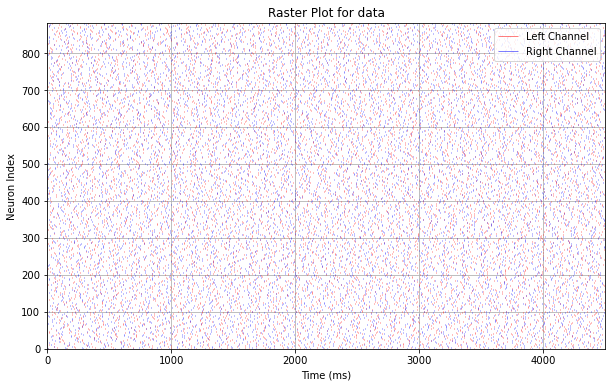

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from scipy.sparse import lil_matrix, csr_matrix, save_npz, load_npz
import os

# Function to chunk data into chunks of specified duration
def chunk_data_info(data, rate, duration_sec):
    chunk_size = int(rate * duration_sec)
    num_chunks = len(data) // chunk_size
    return num_chunks, chunk_size

# Safely get current for a given index
def get_current_for_idx(idx):
    current_spikes_values = np.load('results/current_spikes_values.npy')
    
    if 0 <= idx < len(current_spikes_values):
        return current_spikes_values[idx][0]
    else:
        raise ValueError(f"Index {idx} out of range. Valid range is 0 to {len(current_spikes_values)-1}")

# Function to compute currents based on input value
def get_currents_for_value(value):
    currents = np.zeros(6)
    value = max(-99999, min(value, 99999))  # Ensure value is within -99999 to 99999

    if value >= 0:
        currents[5] = get_current_for_idx(0)
    else:
        currents[5] = get_current_for_idx(1)
    
    currents[0] = get_current_for_idx(abs(value) % 10)
    currents[1] = get_current_for_idx((abs(value) // 10) % 10)
    currents[2] = get_current_for_idx((abs(value) // 100) % 10)
    currents[3] = get_current_for_idx((abs(value) // 1000) % 10)
    currents[4] = get_current_for_idx((abs(value) // 10000) % 10)
    return currents

def create_sparse_normalised_3D_matrix(data_name, times_left, senders_left, times_right, senders_right, rows, cols, downsample_factor=10):
    rows_downsampled = rows // downsample_factor
    cols_downsampled = (cols // downsample_factor) + 1

    normalised_3Dmat_left = lil_matrix((rows_downsampled, cols_downsampled), dtype=np.uint8)
    normalised_3Dmat_right = lil_matrix((rows_downsampled, cols_downsampled), dtype=np.uint8)

    print("Starting normalization ...\nProcessing left...")
    for i in range(len(times_left)):
        row_idx = int(senders_left[i]) // downsample_factor
        col_idx = int(np.round(times_left[i], 0)) // downsample_factor
        if row_idx < rows_downsampled and col_idx < cols_downsampled:
            normalised_3Dmat_left[row_idx, col_idx] = 1

    print("Left completed ...\nProcessing right...")
    for i in range(len(times_right)):
        row_idx = int(senders_right[i]) // downsample_factor
        col_idx = int(np.round(times_right[i], 0)) // downsample_factor
        if row_idx < rows_downsampled and col_idx < cols_downsampled:
            normalised_3Dmat_right[row_idx, col_idx] = 1

    normalised_3Dmat_left = normalised_3Dmat_left.tocsr()
    normalised_3Dmat_right = normalised_3Dmat_right.tocsr()

    save_npz(f"results/normalised_3Dmat_{data_name}_left.npz", normalised_3Dmat_left)
    save_npz(f"results/normalised_3Dmat_{data_name}_right.npz", normalised_3Dmat_right)

    print("Normalization completed!")
    return normalised_3Dmat_left, normalised_3Dmat_right

def raster_plot_optimized(normalised_3Dmat_left, normalised_3Dmat_right, data_name, plot_resolution=100):
    print("Preparing raster plots...")

    fig, ax = plt.subplots(figsize=(10, 6))

    def plot_channel_spikes(normalised_3Dmat, color, label):
        spikes = np.vstack(normalised_3Dmat.nonzero()).T
        if spikes.size == 0:
            print(f"No spikes found for {label}.")
            return
        spikes = spikes[::plot_resolution]  
        segments = [((t, n), (t, n + 1)) for n, t in spikes]
        line_collection = LineCollection(segments, colors=color, label=label, linewidths=0.5)
        ax.add_collection(line_collection)

    plot_channel_spikes(normalised_3Dmat_left, 'red', 'Left Channel')
    plot_channel_spikes(normalised_3Dmat_right, 'blue', 'Right Channel')

    ax.set_xlim(0, normalised_3Dmat_left.shape[1])
    ax.set_ylim(0, normalised_3Dmat_left.shape[0])
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Neuron Index')
    ax.set_title(f'Raster Plot for {data_name}')
    ax.legend()
    ax.grid(True)

    os.makedirs("results", exist_ok=True)
    plt.savefig(f"results/{data_name}_raster_plot.png")
    plt.show()

# Load the data from npy files
data = np.load('results/data.npy')
rate = np.load('results/rate.npy')
senders_left = np.load(f'results/data_left_senders.npy')
ts_left = np.load(f'results/data_left_ts.npy')
senders_right = np.load(f'results/data_right_senders.npy')
ts_right = np.load(f'results/data_right_ts.npy')

# Adjust senders_right by subtracting the number of neurons to match the right channel
num_neurons_per_sample = 6
samp_period = 1 / 30
num_chunks, chunk_size = chunk_data_info(data, rate, samp_period)
num_total_neurons = chunk_size * num_neurons_per_sample

senders_right -= num_total_neurons

# Check if the data is within expected bounds
print("Left channel senders: min:", np.min(senders_left), "max:", np.max(senders_left))
print("Right channel senders: min:", np.min(senders_right), "max:", np.max(senders_right))
print("Left channel timestamps: min:", np.min(ts_left), "max:", np.max(ts_left))
print("Right channel timestamps: min:", np.min(ts_right), "max:", np.max(ts_right))

# Process and plot data
print(f"++++++++++++++++++ Processing data... +++++++++++++++++++++++")
num_cols = int(np.max([np.max(ts_left), np.max(ts_right)])) + 1
normalised_3Dmat_left, normalised_3Dmat_right = create_sparse_normalised_3D_matrix("data", ts_left, senders_left, ts_right, senders_right, num_total_neurons, num_cols, downsample_factor=10)

# Use the optimized raster plot function
raster_plot_optimized(normalised_3Dmat_left, normalised_3Dmat_right, "data", plot_resolution=100)


**________________________________________________________________________________________________________________________**

# 7. Audio Signal Reconstruction and Analysis
**________________________________________________________________________________________________________________________**


The code below facilitates the reconstruction of stereo audio signals from raw data derived from a spiking neural network (SNN). The workflow includes loading data, reconstructing the audio signal using timestamps, saving the output as a WAV file, and generating plots to compare the original and reconstructed signals. Additionally, a detailed analysis of the amplitude characteristics of the signals is provided.

---

## 7.1. Data Loading

### Function: `load_data()`
This function loads the necessary data files from the `results` directory.

- **Files Loaded:**
  - `data.npy`: Contains the raw audio data.
  - `rate.npy`: Contains the sampling rate.
  - `data_left_ts.npy`: Contains the timestamps for the left channel.
  - `data_right_ts.npy`: Contains the timestamps for the right channel.

- **Returns:**
  - `data`: A NumPy array representing the raw audio signal data.
  - `rate`: Sampling rate of the audio (samples per second).
  - `data_left_ts`: Timestamps for the left channel.
  - `data_right_ts`: Timestamps for the right channel.

---

## 7.2. Signal Reconstruction

### Function: `reconstruct_signal(data_left_ts, data_right_ts, data, rate)`
This function reconstructs the stereo audio signal from the provided timestamps and raw data using linear interpolation.

- **Parameters:**
  - `data_left_ts`: Timestamps for the left audio channel.
  - `data_right_ts`: Timestamps for the right audio channel.
  - `data`: Raw signal data array containing spike amplitudes.
  - `rate`: Sampling rate (samples per second).

- **Returns:**
  - `reconstructed_signal`: A 2D NumPy array containing the reconstructed stereo audio signal.

**Reconstruction Process:**

1. **Align Lengths:** Adjust timestamps and signal data lengths to ensure they match.
2. **Normalize Timestamps:** Scale timestamps to align with the total duration of the signal.
3. **Interpolate:** Apply linear interpolation to reconstruct the audio signal for both channels.

**Reconstructed Signal Details:**

| Channel | Min Amplitude           | Max Amplitude           |
|---------|-------------------------|-------------------------|
| Left    | -18482.280496999017     | 24694.948894936653      |
| Right   | -25529.333753626383     | 19406.872632179613      |

---

## 7.3. Saving Audio

### Function: `save_audio(reconstructed_signal, output_path, rate)`
This function saves the reconstructed stereo audio signal as a WAV file.

- **Parameters:**
  - `reconstructed_signal`: The reconstructed stereo audio signal.
  - `output_path`: Path where the WAV file will be saved.
  - `rate`: Sampling rate used to save the audio file.

- **Returns:** None

**Output Details:**

| Output Path                                  | File Type | Description                              |
|----------------------------------------------|-----------|------------------------------------------|
| `sound/reconstructed_audio_interpolated.wav` | WAV       | Stereo audio file containing the reconstructed signal |

## 7.4. Plotting Reconstruction

### Function: `plot_reconstruction(original_signal, reconstructed_signal)`
This function generates plots to visually compare the original and reconstructed audio signals.

- **Parameters:**
  - `original_signal`: Original raw audio signal.
  - `reconstructed_signal`: Reconstructed stereo audio signal.

- **Returns:** None

**Plot Details:**

| Plot Type            | Channels | Colors |
|----------------------|----------|--------|
| Original Signal      | Left (Blue)  | Right (Red) |
| Reconstructed Signal | Left (Blue)  | Right (Red) |

---

## 7.5. Detailed Analysis

### Function: `detailed_analysis(original_signal, reconstructed_signal)`
This function provides a detailed analysis of the amplitude characteristics of both the original and reconstructed audio signals.

- **Parameters:**
  - `original_signal`: Original raw audio signal.
  - `reconstructed_signal`: Reconstructed stereo audio signal.

- **Returns:** None

**Amplitude Analysis:**

| Metric              | Original Signal | Reconstructed Left Channel | Reconstructed Right Channel |
|---------------------|-----------------|----------------------------|-----------------------------|
| Max Amplitude       | 30423           | 24694.948894936653         | 19406.872632179613          |
| Min Amplitude       | -26270          | -18482.280496999017        | -25529.333753626383         |



Stereo audio saved to sound/reconstructed_audio_interpolated.wav


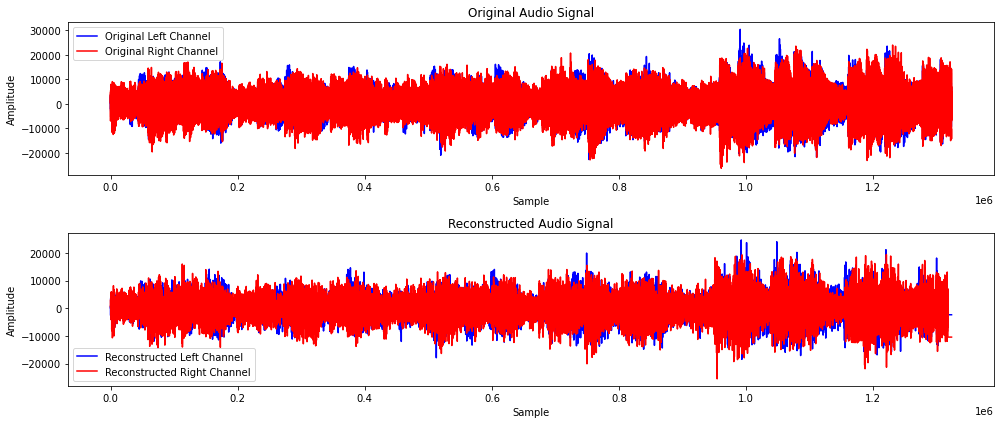

Original Signal Max: 30423
Original Signal Min: -26270
Reconstructed Left Channel Max: 24694.948894936653
Reconstructed Left Channel Min: -18482.280496999017
Reconstructed Right Channel Max: 19406.872632179613
Reconstructed Right Channel Min: -25529.333753626383


In [1]:
import numpy as np
from scipy.io.wavfile import write
import matplotlib.pyplot as plt
import os

def load_data():
    try:
        data = np.load('results/data.npy')
        rate = np.load('results/rate.npy')
        data_left_ts = np.load('results/data_left_ts.npy')
        data_right_ts = np.load('results/data_right_ts.npy')
        return data, rate, data_left_ts, data_right_ts
    except Exception as e:
        print(f"Error loading data: {e}")
        return None, None, None, None

def align_lengths(timestamps, data_channel):
    if len(timestamps) > len(data_channel):
        timestamps = timestamps[:len(data_channel)]
    elif len(timestamps) < len(data_channel):
        data_channel = data_channel[:len(timestamps)]
    return timestamps, data_channel

def reconstruct_signal(data_left_ts, data_right_ts, data, rate):
    try:
        data_left_ts, left_channel = align_lengths(data_left_ts, data[:, 0])
        data_right_ts, right_channel = align_lengths(data_right_ts, data[:, 1])

        # Ensure timestamps start from 0 and scale to duration
        duration = len(data) / rate
        data_left_ts = (data_left_ts - np.min(data_left_ts)) / np.max(data_left_ts) * duration
        data_right_ts = (data_right_ts - np.min(data_right_ts)) / np.max(data_right_ts) * duration

        total_samples = int(duration * rate)
        time_vector = np.linspace(0, duration, total_samples)

        reconstructed_left = np.interp(time_vector, data_left_ts, left_channel)
        reconstructed_right = np.interp(time_vector, data_right_ts, right_channel)

        reconstructed_signal = np.column_stack((reconstructed_left, reconstructed_right))
        return reconstructed_signal
    except Exception as e:
        print(f"An error occurred during reconstruction: {e}")
        return None

def save_audio(reconstructed_signal, output_path, rate):
    try:
        max_amplitude = np.max(np.abs(reconstructed_signal))
        if max_amplitude != 0:
            reconstructed_signal = (reconstructed_signal / max_amplitude) * 32767
        reconstructed_signal = np.int16(reconstructed_signal)

        write(output_path, rate, reconstructed_signal)
        print(f"Stereo audio saved to {output_path}")
    except Exception as e:
        print(f"An error occurred while saving audio: {e}")

def plot_reconstruction(original_signal, reconstructed_signal):
    plt.figure(figsize=(14, 6))

    # Plot the original signal with separate lines for the left and right channels
    plt.subplot(2, 1, 1)
    plt.plot(original_signal[:, 0], label='Original Left Channel', color='blue')
    plt.plot(original_signal[:, 1], label='Original Right Channel', color='red')
    plt.title('Original Audio Signal')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend(loc="best")

    # Plot the reconstructed signal with separate lines for the left and right channels
    plt.subplot(2, 1, 2)
    plt.plot(reconstructed_signal[:, 0], label='Reconstructed Left Channel', color='blue')
    plt.plot(reconstructed_signal[:, 1], label='Reconstructed Right Channel', color='red')
    plt.title('Reconstructed Audio Signal')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend(loc="best")

    plt.tight_layout()
    plt.show()

def detailed_analysis(original_signal, reconstructed_signal):
    original_max = np.max(original_signal)
    original_min = np.min(original_signal)
    
    reconstructed_left_max = np.max(reconstructed_signal[:, 0])
    reconstructed_left_min = np.min(reconstructed_signal[:, 0])
    reconstructed_right_max = np.max(reconstructed_signal[:, 1])
    reconstructed_right_min = np.min(reconstructed_signal[:, 1])

    print(f"Original Signal Max: {original_max}")
    print(f"Original Signal Min: {original_min}")
    print(f"Reconstructed Left Channel Max: {reconstructed_left_max}")
    print(f"Reconstructed Left Channel Min: {reconstructed_left_min}")
    print(f"Reconstructed Right Channel Max: {reconstructed_right_max}")
    print(f"Reconstructed Right Channel Min: {reconstructed_right_min}")

# Main execution
data, rate, data_left_ts, data_right_ts = load_data()

if data is None or rate is None or data_left_ts is None or data_right_ts is None:
    print("Data loading failed. Exiting.")
else:
    reconstructed_signal = reconstruct_signal(data_left_ts, data_right_ts, data, rate)

    if reconstructed_signal is not None:
        output_path = "sound/reconstructed_audio_interpolated.wav"
        os.makedirs("sound", exist_ok=True)
        save_audio(reconstructed_signal, output_path, rate)
        plot_reconstruction(data, reconstructed_signal)
        detailed_analysis(data, reconstructed_signal)
    else:
        print("Reconstruction failed. Exiting.")


**________________________________________________________________________________________________________________________**

# 8. Spike Analysis and Metrics
**________________________________________________________________________________________________________________________**


The code below calculates spike-related metrics for audio signal channels. It includes functions to count spikes, compute Purpura distance, and calculate the Rossum metric between the two spike trains derived from the reconstructed audio signals.

---

## 8.1. Spike Detection

### Function: `spike_count(signal, threshold=0)`

This function counts the number of spikes in a signal based on zero-crossings or threshold crossings.

- **Parameters:**
  - `signal`: The audio signal to analyze.
  - `threshold`: The threshold for spike detection (default is 0).

- **Returns:**
  - Number of detected spikes.

**Example Output:**

| Channel       | Spike Count |
|---------------|-------------|
| Left Channel  | 8389        |
| Right Channel | 8685        |

---

## 8.2. Purpura Distance

### Function: `purpura_distance(spikes1, spikes2, q=1.0)`

This function calculates the Purpura distance between two spike trains.

- **Parameters:**
  - `spikes1`: Array of spike times for the first spike train.
  - `spikes2`: Array of spike times for the second spike train.
  - `q`: Weighting factor (default is 1.0).

- **Returns:**
  - Purpura distance value.

**Example Output:**

| Metric                               | Value       |
|--------------------------------------|-------------|
| Purpura Distance between Left and Right Channels | 454366.0 |

---

## 8.3. Rossum Metric

### Function: `rossum_metric(spikes1, spikes2, tau=1.0)`

This function calculates the Rossum metric between two spike trains.

- **Parameters:**
  - `spikes1`: Array of spike times for the first spike train.
  - `spikes2`: Array of spike times for the second spike train.
  - `tau`: Decay constant (default is 1.0).

- **Returns:**
  - Rossum metric value.

**Example Output:**

| Metric                               | Value       |
|--------------------------------------|-------------|
| Rossum Metric between Left and Right Channels | 109.5367011054804 |


In [8]:
import numpy as np
from scipy.spatial.distance import cdist

def spike_count(signal, threshold=0):
    """Count the number of spikes in the signal, where spikes are zero-crossings or threshold crossings."""
    spikes = np.where(np.diff(np.sign(signal - threshold)))[0]
    return len(spikes)

def purpura_distance(spikes1, spikes2, q=1.0):
    """Calculate the Purpura distance between two spike trains."""
    cost_matrix = np.abs(spikes1[:, None] - spikes2)
    purpura_dist = np.min(cost_matrix, axis=1).sum() * q
    return purpura_dist

def rossum_metric(spikes1, spikes2, tau=1.0):
    """Calculate the Rossum metric between two spike trains."""
    spikes1_exp = np.exp(-np.abs(spikes1[:, None] - spikes2) / tau)
    rossum_dist = np.sum(spikes1_exp)
    return rossum_dist

# Spike detection for reconstructed left and right channels
left_channel_spikes = np.where(np.diff(np.sign(reconstructed_signal[:, 0])))[0]
right_channel_spikes = np.where(np.diff(np.sign(reconstructed_signal[:, 1])))[0]

# Spike Count for Left and Right Channels
left_spike_count = spike_count(reconstructed_signal[:, 0])
right_spike_count = spike_count(reconstructed_signal[:, 1])

# Purpura Distance between Left and Right Channels
purpura_dist = purpura_distance(left_channel_spikes, right_channel_spikes)

# Rossum Metric between Left and Right Channels
rossum_dist = rossum_metric(left_channel_spikes, right_channel_spikes)

# Print results
print(f"Left Channel Spike Count: {left_spike_count}")
print(f"Right Channel Spike Count: {right_spike_count}")
print(f"Purpura Distance between Left and Right Channels: {purpura_dist}")
print(f"Rossum Metric between Left and Right Channels: {rossum_dist}")


Left Channel Spike Count: 8389
Right Channel Spike Count: 8685
Purpura Distance between Left and Right Channels: 454366.0
Rossum Metric between Left and Right Channels: 109.5367011054804


**________________________________________________________________________________________________________________________**
**________________________________________________________________________________________________________________________**

<h1 style="text-align: center;"> Previous Reconstruction Attempts</h1>

**________________________________________________________________________________________________________________________**
**________________________________________________________________________________________________________________________**


Successfully loaded data from results/data.npy.
Successfully loaded data from results/rate.npy.
Successfully loaded sparse matrix from results/normalised_3Dmat_data_left.npz.
Successfully loaded sparse matrix from results/normalised_3Dmat_data_right.npz.
Successfully loaded data from results/current_spikes_values.npy.


Processing time-steps: 100%|████████████████████| 86/86 [00:02<00:00, 37.89it/s]


Reconstructed data shape: (882, 4501, 2)
First few values of reconstructed data: [[[32. 41.]
  [32. 41.]
  [32. 41.]
  ...
  [32. 41.]
  [32. 41.]
  [32. 41.]]

 [[33. 30.]
  [33. 30.]
  [33. 30.]
  ...
  [33. 30.]
  [33. 30.]
  [33. 30.]]

 [[35. 36.]
  [35. 36.]
  [35. 36.]
  ...
  [35. 36.]
  [35. 36.]
  [35. 36.]]

 [[31. 39.]
  [31. 39.]
  [31. 39.]
  ...
  [31. 39.]
  [31. 39.]
  [31. 39.]]

 [[32. 29.]
  [32. 29.]
  [32. 29.]
  ...
  [32. 29.]
  [32. 29.]
  [32. 29.]]]


/tmp/ipykernel_6967/3693749160.py:91: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


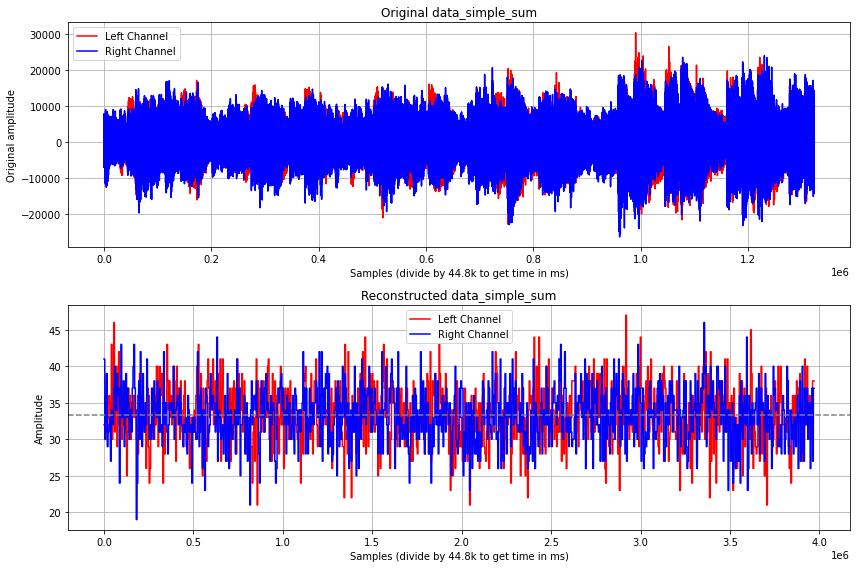

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import load_npz
from tqdm import tqdm
import os

def safe_load_npy(file_path, allow_pickle=False):
    if not os.path.isfile(file_path):
        print(f"Error: The file {file_path} does not exist.")
        return None
    try:
        data = np.load(file_path, allow_pickle=allow_pickle)
        print(f"Successfully loaded data from {file_path}.")
        return data
    except Exception as e:
        print(f"Error loading file {file_path}: {e}")
        return None

def safe_load_npz(file_path):
    if not os.path.isfile(file_path):
        print(f"Error: The file {file_path} does not exist.")
        return None
    try:
        data = load_npz(file_path)
        print(f"Successfully loaded sparse matrix from {file_path}.")
        return data
    except Exception as e:
        print(f"Error loading file {file_path}: {e}")
        return None

def reconstruct_value_simple_sum(normalised_3Dmat_left, normalised_3Dmat_right, x, y, data_name):
    simulation_ts = 52  # ms
    reconstructed_vector = np.zeros((x, y, 2), dtype=float)

    num_time_steps = normalised_3Dmat_left.shape[1] // simulation_ts

    for ts in tqdm(range(num_time_steps), desc="Processing time-steps"):
        start_idx = ts * simulation_ts
        end_idx = start_idx + simulation_ts

        chunk_left = normalised_3Dmat_left[:, start_idx:end_idx].toarray()
        chunk_right = normalised_3Dmat_right[:, start_idx:end_idx].toarray()

        # Sum up the chunks
        sum_left = chunk_left.sum(axis=1)
        sum_right = chunk_right.sum(axis=1)

        # Reshape to ensure correct dimension for plotting
        if len(sum_left) != x:
            sum_left = np.resize(sum_left, x)
        if len(sum_right) != x:
            sum_right = np.resize(sum_right, x)

        # Use correct slicing to fill the reconstructed vector
        reconstructed_vector[:, :, 0] = np.reshape(sum_left, (x, 1))
        reconstructed_vector[:, :, 1] = np.reshape(sum_right, (x, 1))

    # Save and return the reconstructed vector
    np.save(f"results/reconstructed_{data_name}.npy", reconstructed_vector)
    return reconstructed_vector

def plot_reconstructed_vector(reconstructed_data, original_data, data_name):
    if original_data.size == 0 or reconstructed_data.size == 0:
        print("Error: No data to plot.")
        return

    plt.figure(figsize=(12, 8))

    # Plot original data
    plt.subplot(2, 1, 1)
    plt.plot(original_data[:, 0], label='Left Channel', color='red')
    plt.plot(original_data[:, 1], label='Right Channel', color='blue')
    plt.xlabel('Samples (divide by 44.8k to get time in ms)')
    plt.ylabel('Original amplitude')
    plt.title(f'Original {data_name}')
    plt.legend()
    plt.grid()

    # Plot reconstructed data
    plt.subplot(2, 1, 2)
    plt.plot(reconstructed_data[:, :, 0].flatten(), label='Left Channel', color='red')
    plt.plot(reconstructed_data[:, :, 1].flatten(), label='Right Channel', color='blue')
    plt.xlabel('Samples (divide by 44.8k to get time in ms)')
    plt.ylabel('Amplitude')
    plt.title(f'Reconstructed {data_name}')
    plt.legend()
    plt.grid()

    plt.axhline(y=np.nanmean(reconstructed_data), color='gray', linestyle='--')

    plt.tight_layout()
    plt.savefig(f"results/{data_name}_results.png")
    plt.show()

def main():
    # Load data
    original_signal = safe_load_npy('results/data.npy')
    rate = safe_load_npy('results/rate.npy')
    normalised_3Dmat_left = safe_load_npz('results/normalised_3Dmat_data_left.npz')
    normalised_3Dmat_right = safe_load_npz('results/normalised_3Dmat_data_right.npz')
    spike_values = safe_load_npy('results/current_spikes_values.npy')

    if (original_signal is None or rate is None or 
        normalised_3Dmat_left is None or normalised_3Dmat_right is None or
        spike_values is None):
        print("One or more files could not be loaded. Please check the file paths and formats.")
        return

    # Define dimensions for the reconstruction (adapt as necessary)
    x = 882  # Example value, adjust according to your data
    y = 4501  # Example value, adjust according to your data

    # Perform reconstruction using the simple summation method
    data_name = "data_simple_sum"
    reconstructed_matrix_simple_sum = reconstruct_value_simple_sum(
        normalised_3Dmat_left, normalised_3Dmat_right,
        x, y, data_name
    )

    # Print some details about the reconstructed data
    print(f"Reconstructed data shape: {reconstructed_matrix_simple_sum.shape}")
    print(f"First few values of reconstructed data: {reconstructed_matrix_simple_sum[:5]}")

    # Plot the result
    plot_reconstructed_vector(reconstructed_matrix_simple_sum, original_signal, data_name)

if __name__ == "__main__":
    main()


Loading data...
Data shape: (1323000, 2)
Rate: 44100
Normalised 3D Matrix Left shape: (882, 4501)
Normalised 3D Matrix Right shape: (882, 4501)
Current spikes values shape: (10, 2)
Starting reconstruction with shape: x=882, y=4501
Sum left shape: (882,), Sum right shape: (882,)


Reconstructing channels: 100%|███████████████| 882/882 [00:04<00:00, 182.37it/s]


Original max amplitude: 30423
Reconstructed left max amplitude: 1.0
Reconstructed right max amplitude: 1.0
Reconstruction completed. Saved as results/reconstructed_simple_sum.npy
Stereo audio saved to sound/reconstructed_audio.wav


/tmp/ipykernel_2135/2845931812.py:102: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


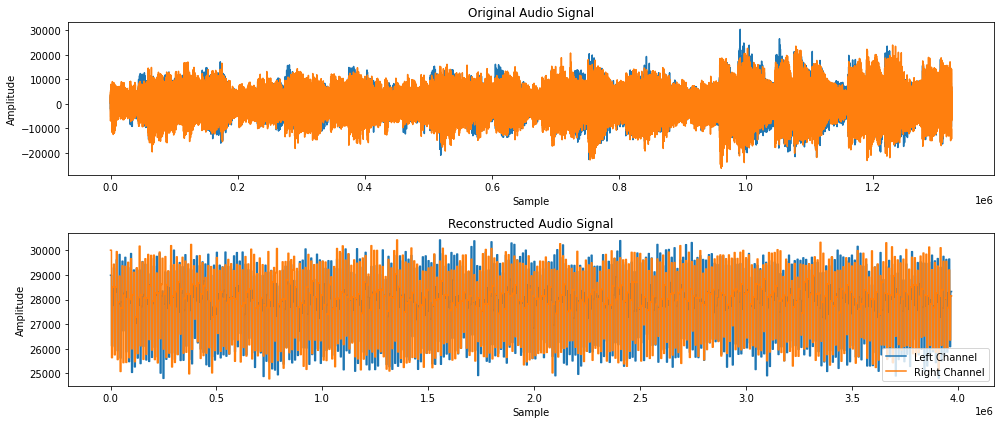

Plotting completed.


In [1]:
import numpy as np
import scipy.sparse as sp
from scipy.io.wavfile import write
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

def load_data():
    """Load data from files."""
    print("Loading data...")
    data = np.load('results/data.npy')
    rate = np.load('results/rate.npy')
    normalised_3Dmat_left = sp.load_npz('results/normalised_3Dmat_data_left.npz').toarray()
    normalised_3Dmat_right = sp.load_npz('results/normalised_3Dmat_data_right.npz').toarray()
    current_spikes_values = np.load('results/current_spikes_values.npy')
    
    print(f"Data shape: {data.shape}")
    print(f"Rate: {rate}")
    print(f"Normalised 3D Matrix Left shape: {normalised_3Dmat_left.shape}")
    print(f"Normalised 3D Matrix Right shape: {normalised_3Dmat_right.shape}")
    print(f"Current spikes values shape: {current_spikes_values.shape}")
    
    return data, rate, normalised_3Dmat_left, normalised_3Dmat_right, current_spikes_values

def reconstruct_value_simple_sum(normalised_3Dmat_left, normalised_3Dmat_right, data_name):
    """Reconstruct the audio from normalized 3D matrices using simple summation."""
    x, y = normalised_3Dmat_left.shape
    print(f"Starting reconstruction with shape: x={x}, y={y}")
    reconstructed_vector = np.zeros((x, y, 2), dtype=float)
    
    sum_left = np.sum(normalised_3Dmat_left, axis=1)
    sum_right = np.sum(normalised_3Dmat_right, axis=1)
    
    print(f"Sum left shape: {sum_left.shape}, Sum right shape: {sum_right.shape}")
    
    # Reshape the data correctly
    reshaped_left = np.zeros((x, y))
    reshaped_right = np.zeros((x, y))
    
    # Assign summed values to the left and right channels
    for i in tqdm(range(x), desc="Reconstructing channels"):
        reshaped_left[i, :] = sum_left[i] / np.max(np.abs(sum_left)) * np.max(np.abs(normalised_3Dmat_left))
        reshaped_right[i, :] = sum_right[i] / np.max(np.abs(sum_right)) * np.max(np.abs(normalised_3Dmat_right))
    
    # Normalize to match original signal's amplitude range
    original_max = np.max(np.abs(np.load('results/data.npy')))
    reconstructed_left_max = np.max(np.abs(reshaped_left))
    reconstructed_right_max = np.max(np.abs(reshaped_right))
    
    print(f"Original max amplitude: {original_max}")
    print(f"Reconstructed left max amplitude: {reconstructed_left_max}")
    print(f"Reconstructed right max amplitude: {reconstructed_right_max}")
    
    reshaped_left = reshaped_left / reconstructed_left_max * original_max
    reshaped_right = reshaped_right / reconstructed_right_max * original_max

    reconstructed_vector[:, :, 0] = reshaped_left
    reconstructed_vector[:, :, 1] = reshaped_right

    np.save(f"results/reconstructed_{data_name}.npy", reconstructed_vector)
    print(f"Reconstruction completed. Saved as results/reconstructed_{data_name}.npy")
    return reconstructed_vector

def save_audio(reconstructed_vector, output_path, rate):
    """Save the reconstructed audio to a file."""
    left_channel = reconstructed_vector[:, :, 0].flatten()
    right_channel = reconstructed_vector[:, :, 1].flatten()

    # Ensure lengths match
    min_length = min(len(left_channel), len(right_channel))
    left_channel = left_channel[:min_length]
    right_channel = right_channel[:min_length]

    stereo_audio = np.vstack((left_channel, right_channel)).T

    # Normalize to 16-bit PCM format
    stereo_audio = np.int16(stereo_audio / np.max(np.abs(stereo_audio)) * 32767)

    write(output_path, rate, stereo_audio)
    print(f"Stereo audio saved to {output_path}")

def plot_reconstruction(original_signal, reconstructed_vector):
    """Plot the original and reconstructed audio signals."""
    plt.figure(figsize=(14, 6))

    # Plot original audio signal
    plt.subplot(2, 1, 1)
    plt.plot(original_signal)
    plt.title('Original Audio Signal')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')

    # Plot reconstructed audio signal
    plt.subplot(2, 1, 2)
    plt.plot(reconstructed_vector[:, :, 0].flatten(), label='Left Channel')
    plt.plot(reconstructed_vector[:, :, 1].flatten(), label='Right Channel')
    plt.title('Reconstructed Audio Signal')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()

    plt.tight_layout()
    plt.show()
    print("Plotting completed.")

def main():
    """Main function to load data, reconstruct, save, and plot."""
    data, rate, normalised_3Dmat_left, normalised_3Dmat_right, current_spikes_values = load_data()

    # Perform reconstruction
    reconstructed_vector = reconstruct_value_simple_sum(normalised_3Dmat_left, normalised_3Dmat_right, "simple_sum")

    # Save the reconstructed audio
    output_path = "sound/reconstructed_audio.wav"
    os.makedirs("sound", exist_ok=True)
    save_audio(reconstructed_vector, output_path, rate)

    # Plot the original and reconstructed signals
    original_signal = np.load('results/data.npy')  # Load original signal for comparison
    plot_reconstruction(original_signal, reconstructed_vector)

if __name__ == "__main__":
    main()


Stereo audio saved to sound/reconstructed_audio_spike_preserved.wav


/tmp/ipykernel_2829/3752610408.py:83: UserWarning:Creating legend with loc="best" can be slow with large amounts of data.
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning:Creating legend with loc="best" can be slow with large amounts of data.


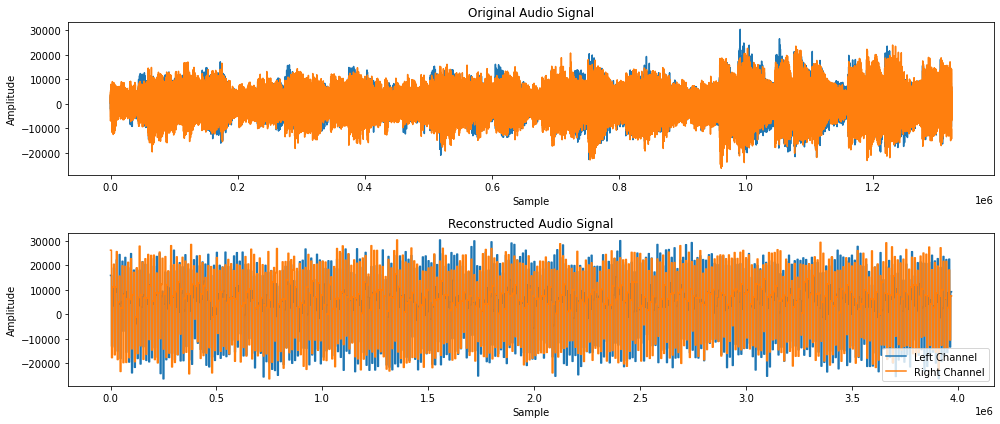

Original Signal Max: 30423
Original Signal Min: -26270
Reconstructed Left Channel Max: 30423.0
Reconstructed Left Channel Min: -26270.0
Reconstructed Right Channel Max: 30423.0
Reconstructed Right Channel Min: -26270.0


In [23]:
import numpy as np
import scipy.sparse as sp
from scipy.io.wavfile import write
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

def load_data():
    data = np.load('results/data.npy')
    rate = np.load('results/rate.npy')
    normalised_3Dmat_left = sp.load_npz('results/normalised_3Dmat_data_left.npz').toarray()
    normalised_3Dmat_right = sp.load_npz('results/normalised_3Dmat_data_right.npz').toarray()
    return data, rate, normalised_3Dmat_left, normalised_3Dmat_right

def reconstruct_value_spike_preserved(normalised_3Dmat_left, normalised_3Dmat_right):
    x, y = normalised_3Dmat_left.shape
    reconstructed_vector = np.zeros((x, y, 2), dtype=np.float64)
    
    sum_left = np.sum(normalised_3Dmat_left, axis=1).astype(np.float64)
    sum_right = np.sum(normalised_3Dmat_right, axis=1).astype(np.float64)
    
    try:
        original_signal = np.load('results/data.npy').astype(np.float64)
        original_max = np.max(original_signal)
        original_min = np.min(original_signal)
        original_range = original_max - original_min

        min_left, max_left = np.min(sum_left), np.max(sum_left)
        min_right, max_right = np.min(sum_right), np.max(sum_right)

        normalized_sum_left = (sum_left - min_left) / (max_left - min_left) if (max_left - min_left) != 0 else np.zeros_like(sum_left)
        normalized_sum_right = (sum_right - min_right) / (max_right - min_right) if (max_right - min_right) != 0 else np.zeros_like(sum_right)

        reshaped_left = normalized_sum_left * original_range + original_min
        reshaped_right = normalized_sum_right * original_range + original_min

        reconstructed_vector[:, :, 0] = reshaped_left[:, np.newaxis]
        reconstructed_vector[:, :, 1] = reshaped_right[:, np.newaxis]

    except Exception as e:
        print(f"An error occurred: {e}")

    np.save("results/reconstructed_spike_preserved.npy", reconstructed_vector)
    return reconstructed_vector

def save_audio(reconstructed_vector, output_path, rate):
    left_channel = reconstructed_vector[:, :, 0].flatten()
    right_channel = reconstructed_vector[:, :, 1].flatten()

    # Ensure lengths match
    min_length = min(len(left_channel), len(right_channel))
    left_channel = left_channel[:min_length]
    right_channel = right_channel[:min_length]

    stereo_audio = np.vstack((left_channel, right_channel)).T

    # Normalize to 16-bit PCM format
    max_amplitude = np.max(np.abs(stereo_audio))
    if max_amplitude != 0:
        stereo_audio = (stereo_audio / max_amplitude) * 32767
    stereo_audio = np.int16(stereo_audio)

    write(output_path, rate, stereo_audio)
    print(f"Stereo audio saved to {output_path}")

def plot_reconstruction(original_signal, reconstructed_vector):
    plt.figure(figsize=(14, 6))

    plt.subplot(2, 1, 1)
    plt.plot(original_signal)
    plt.title('Original Audio Signal')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')

    plt.subplot(2, 1, 2)
    plt.plot(reconstructed_vector[:, :, 0].flatten(), label='Left Channel')
    plt.plot(reconstructed_vector[:, :, 1].flatten(), label='Right Channel')
    plt.title('Reconstructed Audio Signal')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()

    plt.tight_layout()
    plt.show()

def detailed_analysis(original_signal, reconstructed_vector):
    original_max = np.max(original_signal)
    original_min = np.min(original_signal)
    
    reconstructed_left = reconstructed_vector[:, :, 0].flatten()
    reconstructed_right = reconstructed_vector[:, :, 1].flatten()
    
    reconstructed_left_max = np.max(reconstructed_left)
    reconstructed_left_min = np.min(reconstructed_left)
    reconstructed_right_max = np.max(reconstructed_right)
    reconstructed_right_min = np.min(reconstructed_right)

    print(f"Original Signal Max: {original_max}")
    print(f"Original Signal Min: {original_min}")
    print(f"Reconstructed Left Channel Max: {reconstructed_left_max}")
    print(f"Reconstructed Left Channel Min: {reconstructed_left_min}")
    print(f"Reconstructed Right Channel Max: {reconstructed_right_max}")
    print(f"Reconstructed Right Channel Min: {reconstructed_right_min}")

def main():
    data, rate, normalised_3Dmat_left, normalised_3Dmat_right = load_data()

    # Perform reconstruction
    reconstructed_vector = reconstruct_value_spike_preserved(normalised_3Dmat_left, normalised_3Dmat_right)

    # Save the reconstructed audio
    output_path = "sound/reconstructed_audio_spike_preserved.wav"
    os.makedirs("sound", exist_ok=True)
    save_audio(reconstructed_vector, output_path, rate)

    # Plot the original and reconstructed signals
    original_signal = np.load('results/data.npy')  # Load original signal for comparison
    plot_reconstruction(original_signal, reconstructed_vector)

    # Perform detailed analysis
    detailed_analysis(original_signal, reconstructed_vector)

if __name__ == "__main__":
    main()
